<center><h1 class="background-title">Workshop 09 - Background<br>MLP & PyTorch</h1></center>

## Artificial Neural Networks (ANN) 

ANNs are mathematical models which are inspired by biological neural networks. Like the biological networks, they are composed of a network of simple units, each performing a simple mathematical operation, which are connected together in order to model complex functions. These units are usually referred to as artificial neurons.

<center><img src="../media/diagrams/networks/ann.png" height="300px" style="height:300px"/></center>

Commonly these neurons are selected to be a linear function of the input followed by a non-linear function:

$$
h\left(\boldsymbol{x}\ ;\boldsymbol{\theta},b\right)=\varphi\left(\boldsymbol{\theta}^T\boldsymbol{x}+b\right)
$$

Where $\varphi$ is the non-linear function, called the activation function. Some commonly used activation functions are:

- The logistic function. Also commonly referred to as a sigmoid: $\varphi\left(x\right)=\frac{1}{1+e^-x}$
- Hyperbolic tangent: $\varphi\left(x\right)=\tanh\left(x/2\right)$
- Rectifier function (known as ReLU (Rectified Linear Unit): $\varphi\left(x\right)=\max\left(x,0\right)$

The way in which the neurons are connected is usually called the architecture of the network. We can distinguish between two types of networks:
- **Feed-forward networks**: in which data in the network flow in a directed manner, from the input to the output without creating any loops.
- **recurrent networks**: In which the architectures might contain cyclic paths. These networks are outside the scope of this course.

Units which are not connected directly to the output, i.e., are not at the end of the network, are called **hidden units**. A network which contains routes that paths which connect the input to the output through multiple hidden layers are usually referred to as **Deep Neural Networks (DNN)**.

In the context of machine learning, we will try to adjust the parameters of the network based on the collected data. In feed-forward networks, this is usually done using gradients descent methods which are calculated using **back propagation**.  

## Multilayer Perceptron (MLP)

The most basic model for a network which contains hidden units is the **Multilayer Perceptron (MLP)**. In this model, the neurons are organized in at least two layers, where each neuron is fed by the outputs of **all** the neurons in the previous layer. This property is referred to as a network with **fully connected layers**.

<center><img src="../media/diagrams/networks/mlp.png" height="300px" style="height:300px"/></center>

An MLP network is defined by:

- The number of layers.
- The number of neurons in each layer.
- The activation functions of the neurons.

## Naming Differences

- Mathematically, the name **loss function** is broadly used to describe any objective function which is to be minimized. In this course, we have used this term to describe the penalty we get for a single prediction, $l\left(\hat{y},y\right)$. We have used the terms **risk/cost functions** as the mean, or empirical mean, of the loss function. In the context of deep learning people commonly use the term loss function in it's broader meaning, and use it to describe either the risk/cost functions themselves or to the optimization's objective function in general.

- Mathematically, the name **sigmoid** refers to a range of S-shaped function. In the context of deep learning, this name usually refers to the logistic function. (To be more precisely, a sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point).


<center><h1 class="workshop-title">Workshop 09<br>MLP & PyTorch</h1></center>

## In this workshop

This workshop will be a more technical workshop in which we will mainly focus on the **PyTorch** framework.

## Deep Learning Frameworks

With the rise in popularity of deep learning, a lot of great frameworks are currently actively maintained and developed continuously. The majority of them come with an open source license. Use of these frameworks makes working with deep neural networks much more simpler and efficient, mostly in terms of implementation. 

Here is a partial list of some of the currently popular frameworks:

- **[TensorFlow](https://www.tensorflow.org/)**: A python package which was initially developed and is backed by Google. It is currently the most popular framework.

- **[PyTorch](https://pytorch.org/)**: A python framework which is based on the older [Torch](http://torch.ch/) framework, which was written in [LUA](https://en.wikipedia.org/wiki/Lua_(programming_language)). It was initially developed and is backed by Facebook. It is a slightly younger framework which is rapidly gaining popularity. Currently, it is almost as popular as Tensorflow.

- **[Caffe](https://caffe.berkeleyvision.org/) & [Caffe2](https://caffe2.ai/)**: Has support for C, c++, Python, and Matlab. Was developed at Berkeley and is currently maintained by Facebook. It is a relatively older framework and is quite popular although it seems as if it's popularity is decreasing.

- **[Keras](https://keras.io/)**: A Python framework which is built in top of other frameworks, such as Tensorflow, and is intended to provide a more "human-friendly" interface. It operates at a higher level of abstraction and provides less control over the fine details of the process.

- **[fast.ai](https://www.fast.ai/)**: A recently released framework which is built around PyTorch and is designed to incorporate the common best practices into the library. The framework is receiving a lot of positive feedback and is starting gaining popularity.

- **[Matlab](https://www.mathworks.com/help/deeplearning/getting-started-with-deep-learning-toolbox.html)**: Recently, Matlab has published a deep learning toolbox for working with deep neural networks.

In this course, we have decided to use PyTorch over Tensorflow, since it uses an intuitive NumPy-like interface, which makes it easier to get started with.

## GPUs

One of the main things which boosted the use of deep neural networks is the advances in GPUs technology in recent years. Using gradient descent to learning the parameters of a network with a large number of parameters, based on large datasets, can be very slow. By using GPUs to parallelize the process of passing data through the network and the process of the back propagation calculation, we can significantly reduce the learning time. 

All of the above frameworks support performing most of the calculation to the GPU.

## PyTorch Basics

### PyTorch Tutorials

This workshop only scratches the surface of PyTorch and, it is recommended to take some time to better understand the framework before working with it.

As part of its documentation, PyTorch has some great tutorial on his [website](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html). The "60 Minute Blitz" along with the "Learning PyTorch with Examples" provides a great starting point.

### Tensors

The basic PyTorch object is the tensor with has a very similar interface to that of a NumPy array.

Let us look at the 3 following vectors and the function operating on them:

$$
\boldsymbol{x}_1=\left(1,2\right)^T\\
\boldsymbol{x}_2=\left(3,4\right)^T\\
\boldsymbol{x}_3=\left(5,6\right)^T\\
y=\left(\boldsymbol{x}_1+2\boldsymbol{x}_2\right)^T\boldsymbol{x}_3/5
$$

The following code imports the PyTorch package, defines the 3 tensors and calculates $y$:

In [ ]:
import torch  ## importing PyTorch

## Defining the x's
x1 = torch.tensor([1.,2.])
x2 = torch.tensor([3.,4.])
x3 = torch.tensor([5.,6.])


## Calculating y
y = torch.matmul((x1 + 2*x2), x3) / 5

## Printing Everything
print('x1 = {}'.format(x1))
print('x2 = {}'.format(x2))
print('x3 = {}'.format(x2))
print('y = {}'.format(y))

x1 = tensor([1., 2.])
x2 = tensor([3., 4.])
x3 = tensor([3., 4.])
y = 19.0


### A Function as a Graph

To better understand how PyTorch calculated the gradients using back propagation, let us draw the above function as a graph which consists of nodes of simple operations:

<center><img src="../media/diagrams/networks/graph.png" height="300px" style="height:300px"/></center>


Here $\left<,\right>$ is a dot product between vectors.

The following code re-calculates $y$, this time using intermediate variables, $z_i$'s. 

*We are implementing the function this way only in order to understand the framework. This is unneeded in a general case.*

In [ ]:
z1 = x2 * 2
z2 = x1 + z1
z3 = torch.matmul(z2, x3)
y = z3 / 5

print('z1 = {}'.format(str(z1)))
print('z2 = {}'.format(str(z2)))
print('z3 = {}'.format(str(z3)))

z1 = tensor([6., 8.])
z2 = tensor([ 7., 10.])
z3 = tensor(95.)


### Autograd - The Forward Graph

One of the features which makes PyTorch very powerful, is it's ability to automatically calculate the gradients. It dose so by automatically calculating the forward and back graphs which it can then use to calculate the gradients. 

When performing calculations with tensors, we can tell PyTorch  to build the forward graph (the function's graph) based on the calculation we are performing. In order to do, so we need to set the **requires_grad** flag of the input variables to true. This flag exists for any tensor, and it set  to false by default set to false.

The following code re-calculates the function, but this time with the requires_grad flag set to true for 2 of the three input variable.

In [ ]:
x1 = torch.tensor([1.,2.], requires_grad=True)
x2 = torch.tensor([3.,4.])
x3 = torch.tensor([5.,6.], requires_grad=True)

z1 = x2 * 2
z2 = x1 + z1
z3 = torch.matmul(z2, x3)
y = z3 / 5

print('x1 = {}'.format(str(x1)))
print('x2 = {}'.format(str(x2)))
print('x3 = {}'.format(str(x3)))
print('z1 = {}'.format(str(z1)))
print('z2 = {}'.format(str(z2)))
print('z3 = {}'.format(str(z3)))
print('y = {}'.format(str(y)))

x1 = tensor([1., 2.], requires_grad=True)
x2 = tensor([3., 4.])
x3 = tensor([5., 6.], requires_grad=True)
z1 = tensor([6., 8.])
z2 = tensor([ 7., 10.], grad_fn=<AddBackward0>)
z3 = tensor(95., grad_fn=<DotBackward>)
y = tensor(19., grad_fn=<DivBackward0>)


In this run PyTorch has created the forward graph for the relevant paths (startnig at $\boldsymbol{x}_1$ or $\boldsymbol{x}_3$). We can see that the relevant tensors have a **grad_fn** attached to them which tells PyTorch how they were created.

for example, the y variable which is created by dividing $\boldsymbol{z}_3$ by 5 has a grad_fn of type **DivBackward** which corresponding to a division.

In [ ]:
print('y was created using the following node: {}'.format(y.grad_fn))

y was created using the following node: <DivBackward0 object at 0x7ff03c4514e0>


We can further traverse the graph by looking at the property of **next_function** of grad_fn to see what were the operations which created the inputs to the division node (which in our case are the operations creating $\boldsymbol{z}_3$ and the operations creating 5, which are none)

In [ ]:
print('y\'s inputs were created using the following nodes:')
print('    {}'.format(y.grad_fn.next_functions))
print()
print('Check that this node is the same node which created z3:')
print('    {}'.format(y.grad_fn.next_functions[0][0] is z3.grad_fn))


y's inputs were created using the following nodes:
    ((<DotBackward object at 0x7ff03c4442e8>, 0), (None, 0))

Check that this node is the same node which created z3:
    True


The full graph is

In [ ]:
print('y')
print('└ {}'.format(y.grad_fn))
print('  ├ {}'.format(y.grad_fn.next_functions[1][0]))
print('  └ {}'.format(y.grad_fn.next_functions[0][0]))
print('    ├ {}'.format(y.grad_fn.next_functions[0][0].next_functions[1][0]))
print('    └ {}'.format(y.grad_fn.next_functions[0][0].next_functions[0][0]))
print('      ├ {}'.format(y.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0]))
print('      └ {}'.format(y.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[1][0]))

y
└ <DivBackward0 object at 0x7fefc4848c50>
  ├ None
  └ <DotBackward object at 0x7fefc4848c88>
    ├ <AccumulateGrad object at 0x7fefc4848cf8>
    └ <AddBackward0 object at 0x7fefc4848c88>
      ├ <AccumulateGrad object at 0x7fefc4848cc0>
      └ None


*AccumulateGrad* is a source point of the graph. Note that the path from $\boldsymbol{x}_2$ to the sum is missing (the second input to the sum is *None*), this is due to the fact that we did not set $\boldsymbol{x}_2$'s *requires_grad* flag to true.

### Autograd - The Backward Graph

Once we have the forward graph, we can ask PyTorch to calculate and evaluate the backward graph. This is done by calling the **backward** function of the output tensor of the graph.

For the above function, the backward graph is the following graph:

<center><img src="../media/diagrams/networks/back.png" height="300px" style="height:300px"/></center>

We will not elaborate on how this graph is constructed and will leave this subject to the tutorials.

Let us calculate the gradients for the given function.

In [ ]:
print('x_1 gradient before: {}'.format(x1.grad))
print('x_2 gradient before: {}'.format(x2.grad))
print('x_3 gradient before: {}'.format(x3.grad))

## Calcualte and evaluate the backward pass
y.backward()
print('')

print('x_1 gradient after: {}'.format(x1.grad))
print('x_2 gradient after: {}'.format(x2.grad))
print('x_3 gradient after: {}'.format(x3.grad))

x_1 gradient before: None
x_2 gradient before: None
x_3 gradient before: None

x_1 gradient after: tensor([1.0000, 1.2000])
x_2 gradient after: None
x_3 gradient after: tensor([1.4000, 2.0000])


### Gradient Descent

By using PyTorch's autograd functionality, we can now more easily perform gradient descent on arbitrary functions. Let us try and use PyTorch to solve this simple optimization problem:

$$
x^*=\underset{x}{\arg\min}\ x^2
$$

PyTorch has built-in classes which can perform the gradient descent optimization for us. For example, the basic gradient descent optimization can be fount at **[torch.optim.SGD](https://pytorch.org/docs/stable/optim.html?highlight=sgd#torch.optim.SGD)**.

To use these optimizers we need to first initialize them with the optimization parameters and the list of tensors for with we would like to optimize. We can then call the optimizer's **step** function for performing update steps after calculating the gradients.

**Important**: In addition, it is necessary to also call the optimizer's **zero_grads** function before each backward step, since by default PyTorch accumulates the gradients as long as they are not cleared.

We will start with $x=1$, use a learning rate of $0.7$ and take 10 gradient steps:

In [ ]:
import torch.optim as optim  ## Import the optimization module of the package

x = torch.tensor(1, dtype=torch.float, requires_grad=True)  ## Inizitalize x
opt = optim.SGD([x], lr=0.7)  ## Initizalie the optimizer

for i in range(10):
    opt.zero_grad()  ## Clean up previous gradients
    y = x ** 2  ## Forward pass
    y.backward()  ## Backward pass

    print('Step {}:, x and it\'s gradient before the update step:   {:.2f}, {:.2f}'.format(i, float(x), float(x.grad)))
    opt.step()  ## Perform the update step

Step 0:, x and it's gradient before the update step:   1.00, 2.00
Step 1:, x and it's gradient before the update step:   -0.40, -0.80
Step 2:, x and it's gradient before the update step:   0.16, 0.32
Step 3:, x and it's gradient before the update step:   -0.06, -0.13
Step 4:, x and it's gradient before the update step:   0.03, 0.05
Step 5:, x and it's gradient before the update step:   -0.01, -0.02
Step 6:, x and it's gradient before the update step:   0.00, 0.01
Step 7:, x and it's gradient before the update step:   -0.00, -0.00
Step 8:, x and it's gradient before the update step:   0.00, 0.00
Step 9:, x and it's gradient before the update step:   -0.00, -0.00


## Using the GPU

All calculations in PYTorch can be performed either on the CPU or the GPU. We can pass a tensor to the GPU by running:

In [ ]:
x1 = torch.tensor(1.).cuda()
## or
x2 = torch.tensor(2.).to('cuda:0')  ## More usful when you have more then 1 gpu
## or
x3 = torch.tensor(3., device='cuda:0')

## This calculation will be perfomed on the GPU
y = x1 + x2 + x3

print('y={} is on: {}'.format(float(y), y.device))

y=6.0 is on: cuda:0


## Defining a Network Object

The more common way to use PyTorch is to define a network object. This is done by creating a class which is a subclass of the basic **torch.nn.Model** class, and implementing the **__init__** and **forward** functions for in it.

Let us solve a simple linear regression problem:

$$
y = \theta_1\cdot x_1 + \theta_2\cdot x_2
$$

With an $L2$ loss function.

To generate the data, we shall use:

$$
y = 2\cdot x_1 - x_2 + n \\
X_1\sim U\left(0,1\right) \\
X_2\sim U\left(0,1\right) \\
N\sim N\left(0,1\right) \\
$$

In [ ]:
## Generate the data
## =================
import numpy as np
rand_gen = np.random.RandomState(0)
x = rand_gen.rand(1000, 2)
y = x @ np.array([2, -1]) + rand_gen.randn(1000)

## Convert NumPy arrays to tensors on GPU
## ======================================
x = torch.tensor(x).float().cuda()
y = torch.tensor(y).float().cuda()

## Define the network 
## ==================
import torch.nn as nn

class LinReg(nn.Module):
    def __init__(self):
        ## The following line should appear in the beginning of the __init__ function.
        ## It is related to inheritance, and we will not elaborate on this here.
        super(LinReg, self).__init__()
        
        self.theta = nn.Parameter(data=torch.tensor([0., 0.]), requires_grad=True)
        
    def forward(self, x):
        y = torch.matmul(x, self.theta)
        return y

lin_reg = LinReg().cuda()

    
## Run the optimization
## ====================
opt = optim.SGD(lin_reg.parameters(), lr=1.)  ## Initizalie the optimizer

for i in range(10):
    opt.zero_grad()  ## Clean up previous gradients
    
    ## Forward pass
    y_hat = lin_reg(x)
    loss = torch.mean((y - y_hat) ** 2) ** 0.5
    ## Backward pass
    loss.backward()

    print('Step {}:, theta: {:.2f}, {:.2f}'.format(i, float(lin_reg.theta[0]), float(lin_reg.theta[1])))
    
    opt.step()  ## Perform the update step

Step 0:, theta: 0.00, 0.00
Step 1:, theta: 0.32, 0.12
Step 2:, theta: 0.54, 0.14
Step 3:, theta: 0.69, 0.10
Step 4:, theta: 0.81, 0.04
Step 5:, theta: 0.91, -0.03
Step 6:, theta: 1.00, -0.11
Step 7:, theta: 1.08, -0.18
Step 8:, theta: 1.15, -0.25
Step 9:, theta: 1.21, -0.31


## Building on Existing Modules

PyTorch comes with existing modules such an MxN linear operator, a logistic function etc. These modules also have their parameters already build in into them. PyTorch also defines some common loss functions such $L1$, $L2$, etc. 

Let us re-write our linear regression model and the optimization using the following two objects:

- **[torch.nn.Linear](https://pytorch.org/docs/stable/nn.html#linear)**: A linear operator with the linear transformation coefficients as weights with optional bias term.
- **[torch.nn.MSELoss](https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss)**: An MSE risk term.

In [ ]:
class LinReg2(nn.Module):
    def __init__(self):
        super(LinReg2, self).__init__()
        self.linear = nn.Linear(2, 1)
        
    def forward(self, x):
        y = self.linear(x)
        return y.view(-1)  ## Reshape x to make it a 1D tensor (vector)

lin_reg = LinReg2().cuda()

## Run the optimization
## ====================
opt = optim.SGD(lin_reg.parameters(), lr=1.)  ## Initizalie the optimizer
loss_func = nn.MSELoss()

for i in range(10):
    opt.zero_grad()  ## Clean up previous gradients
    
    ## Forward pass
    y_hat = lin_reg(x)
    loss = loss_func(y_hat, y) ** 0.5
    ## Backward pass
    loss.backward()

    print('Step {}:, theta: {:.2f}, {:.2f}'.format(i, float(lin_reg.linear.weight[0, 0]), float(lin_reg.linear.weight[0, 1])))
    
    opt.step()  ## Perform the update step

Step 0:, theta: 0.34, -0.45
Step 1:, theta: 0.61, -0.34
Step 2:, theta: 0.63, -0.47
Step 3:, theta: 0.75, -0.50
Step 4:, theta: 0.82, -0.57
Step 5:, theta: 0.90, -0.62
Step 6:, theta: 0.96, -0.67
Step 7:, theta: 1.03, -0.71
Step 8:, theta: 1.09, -0.75
Step 9:, theta: 1.14, -0.79


## Same Problem From last workshop

Let us go back now to the problem from last workshop and solve it using PyTorch.

### 🦠 Dataset: 

Breast Cancer Wisconsin

### ❓️ Problem: 

Predict the Correct Diagnostic

## 🛠️ Preparations

In [ ]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] =120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## A function to add Latex (equations) to output which works also in Google Colabrtroy
## In a regular notebook this could simply be replaced with "display(Markdown(x))"
from IPython.display import HTML
def print_math(x):  # Define a function to preview markdown outputs as HTML using mathjax
    display(HTML(''.join(['<p><script type="text/x-mathjax-config">MathJax.Hub.Config({tex2jax: {inlineMath: [[\'$\',\'$\'], [\'\\\\(\',\'\\\\)\']]}});</script><script src=\'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=TeX-AMS_CHTML\'></script>',x,'</p>'])))

## 🕵️ Data Inspection

In [ ]:
data_file = 'https://yairomer.github.io/ml_course/datasets/breast_cancer.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
print_math('Number of rows in the dataset: $N={}$'.format(number_of_rows))

## Show the first 10 rows
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### 📚 Splitting the dataset

In [ ]:
n_samples = len(dataset)

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 60% train / 20% validation / 20% test
n_samples_train = int(n_samples * 0.6)
n_samples_validation = int(n_samples * 0.2)
n_samples_test = n_samples - n_samples_train - n_samples_validation
train_indices = indices[:n_samples_train]
validation_indices = indices[n_samples_train:(n_samples_train + n_samples_validation)]
test_indices = indices[(n_samples_train + n_samples_validation):]

train_set = dataset.iloc[train_indices]
validation_set = dataset.iloc[validation_indices]
test_set = dataset.iloc[test_indices]

## 💡 Model & Learning Method Suggestion: Linear Logistic Regression with PyTorch

We will solve the exact same problem using the exact same model but this time using the PyTorch frameworks.

### Reminder:

We assume a model of the form:
$$
p\left(y=1|\boldsymbol{x};\boldsymbol{\theta}\right)=1-p\left(y=0|\boldsymbol{x};\boldsymbol{\theta}\right)=g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)=\frac{1}{1+e^{-\boldsymbol{\theta}^T \boldsymbol{x}}}
$$

And would like to select $\boldsymbol{\theta}$ according to:

$$
\begin{align*}
\boldsymbol{\theta}^*
& = \underset{\boldsymbol{\theta}}{\arg\max}\ \mathcal{L}\left(\boldsymbol{\theta};\left\{\boldsymbol{x}_i,y_i\right\}\right) \\
& = \underset{\boldsymbol{\theta}}{\arg\min}\underbrace{-\frac{1}{N}\sum_i\log\left(g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)\right)y_i + \log\left(1-g\left(\boldsymbol{\theta}^T \boldsymbol{x}\right)\right)\left(1-y_i\right)}_{=h\left(\boldsymbol{\theta};\left\{\boldsymbol{x}_i,y_i\right\}\right)} \\
\end{align*}
$$

We will use gradient descent decent for that, where our gradient step will be:

$$
\boldsymbol{\theta}^{\left(k+1\right)}=\boldsymbol{\theta}^{\left(k\right)} - \alpha\nabla_\theta h\left(\boldsymbol{\theta^{\left(k\right)}}\right)
$$

## PyTorch's functions

We shall use the additional PyTorch's functions

- **[torch.nn.Sigmoid](https://pytorch.org/docs/stable/nn.html#sigmoid)** implements the function logistic regression function, which is often also called a sigmoid.

- **[torch.nn.BCELoss](https://pytorch.org/docs/stable/nn.html#bceloss)**: The Binary Cross Entropy Loss, which is the objective function which we are trying to minimize. It is defined as:
$$
l\left(\left\{y_i, p_i\right\}\right)=-\frac{1}{N}\sum_i\log\left(p_i\right)y_i + \log\left(1-p_i\right)\left(1-y_i\right)
$$

Implementation:

In [ ]:
## Prepare the data
## ================

## Define x & y for the train set
x_train = torch.tensor(train_set[['radius_mean', 'texture_mean']].values, dtype=torch.float).cuda()
y_train = torch.tensor((train_set['diagnosis'].values == 'M').astype(int), dtype=torch.int).cuda()

## Define x & y for the validation set
x_val = torch.tensor(validation_set[['radius_mean', 'texture_mean']].values, dtype=torch.float).cuda()
y_val = torch.tensor((validation_set['diagnosis'].values == 'M').astype(int), dtype=torch.int).cuda()

## Define x & y for the test set
x_test = torch.tensor(test_set[['radius_mean', 'texture_mean']].values, dtype=torch.float).cuda()
y_test = torch.tensor((test_set['diagnosis'].values == 'M').astype(int), dtype=torch.int).cuda()

In [ ]:
## Defining the network
class Net(nn.Module):
    def __init__(self, n_features):
        ## The following line should appear in the begining of the __init__ function.
        ## It is realted to inheretance issues and we will not elaborate on this here.
        super(Net, self).__init__()
        
        self.linear = nn.Linear(n_features, 1)  ## A linear model with input of n_features and output of 1. 
        self.sigmoid = nn.Sigmoid()  ## A sigmoid function
    
    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        
        x = x.view(-1)  ## Reshape x to make it a 1D tensor (vector)
        return x

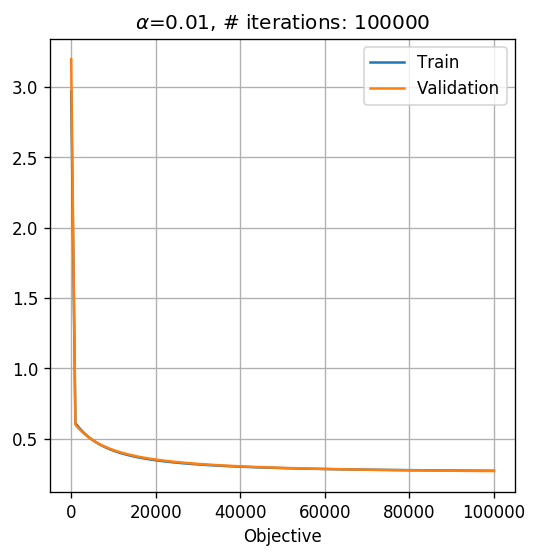

In [ ]:
## The gradient decent algorithm
## =============================
def basic_gradient_decent(net, alpha, tol, max_iter, x_train, y_train, x_val, y_val, store_every=1):
    ## Set the loss function
    loss_func = nn.BCELoss()
    
    ## Initizalie the optimizer
    opt = optim.SGD(net.parameters(), lr=alpha)

    ## Calucalte the initial objective
    prob = net(x_train)
    last_objective = loss_func(prob, y_train.float())
    prob_val = net(x_val)
    last_objective_val = loss_func(prob_val, y_val.float())

    ## Initialize lists to store intermidiate results for plotting
    steps_list = [0]
    objective_list_train = [float(last_objective)]
    objective_list_val = [float(last_objective_val)]

    ## Perforing the update steps
    i_iter = 0
    while True:
        i_iter += 1
                       
        opt.zero_grad()
        prob = net(x_train)
        objective = loss_func(prob, y_train.float())  ## Forward pass
        objective.backward()  ## Backward pass
        opt.step()  ## Perform the update step

        ## Calculate the new objective
        prob_val = net(x_val)
        objective_val = loss_func(prob_val, y_val.float())

        ## Store intermidiate results
        if i_iter % store_every == 0:
            steps_list.append(i_iter)
            objective_list_train.append(float(objective))
            objective_list_val.append(float(objective_val))

        ## Check the stop criteria
        if (torch.abs(objective_val - last_objective_val) < tol) or (i_iter == max_iter):
            break
        last_objective_val = objective_val

    ## Plot results
    ## ============
#     print('The number of iteration performed: {}'.format(i_iter))

    ## convert indermidiate results to numpy arrays
    steps_list = np.array(steps_list)
    objective_list_train = np.array(objective_list_train)
    objective_list_val = np.array(objective_list_val)

    ## Plot
    fig, ax = plt.subplots()
    ax.plot(steps_list, objective_list_train, label='Train')
    ax.plot(steps_list, objective_list_val, label='Validation')
    ax.set_title('$\\alpha$={:g}, # iterations: {}'.format(alpha, i_iter))
    ax.set_xlabel('Step')
    ax.set_xlabel('Objective')
    ax.legend()
    
    return net

## Optimization parameters
## =======================
tol = 1e-7
max_iter = 100000
alpha = 1e-2

net = Net(x_train.shape[1]).cuda()
net = basic_gradient_decent(net, alpha, tol, max_iter, x_train, y_train, x_val, y_val, store_every=1000)

## Evaluate the risk on the test set
test_prediction = net(x_test) > 0.5
test_risk = (test_prediction.int() != y_test).float().mean()

print_math('The test risk is: ${:.2}$'.format(test_risk))

## MLP

To make our network an MLP, we need to add at least one more layer. Let us add a hidden layer of 2 neurons. We will remove the stop criteria for now, in order to see the systems behavior.

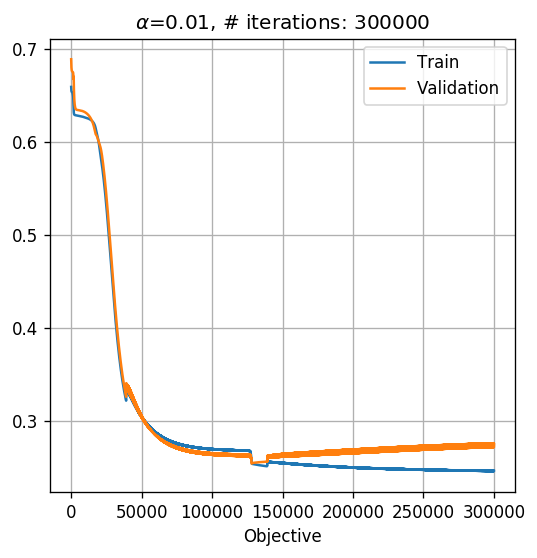

In [ ]:
class NetMLP(nn.Module):
    def __init__(self, n_features, n_units_in_hidden=2):
        ## The following line should appear in the begining of the __init__ function.
        ## It is realted to inheretance issues and we will not elaborate on this here.
        super(NetMLP, self).__init__()
        
        self.linear1 = nn.Linear(n_features, n_units_in_hidden)  ## input: n_features, output: n_units_in_hidden
        self.linear2 = nn.Linear(n_units_in_hidden, 1)  ## input: n_units_in_hidden, output: 1
        self.sigmoid = nn.Sigmoid()  ## A sigmoid function
        
        torch.random.manual_seed(0)
        torch.nn.init.normal_(self.linear1.weight)
        torch.nn.init.normal_(self.linear2.weight)
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.sigmoid(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        
        x = x.view(-1)  ## Reshape x to make it a 1D tensor (vector)
        return x

## Optimization parameters
## =======================
tol = 0 # 1e-7
max_iter = 300000
alpha = 1e-2

net = NetMLP(x_train.shape[1]).cuda()
net = basic_gradient_decent(net, alpha, tol, max_iter, x_train, y_train, x_val, y_val, store_every=1)

## Evaluate the risk on the test set
test_prediction = net(x_test) > 0.5
test_risk = (test_prediction.int() != y_test).float().mean()

print_math('The test risk is: ${:.2}$'.format(test_risk))

### Plotting the discrimination rule

Let us plot the resulting discrimination rule.

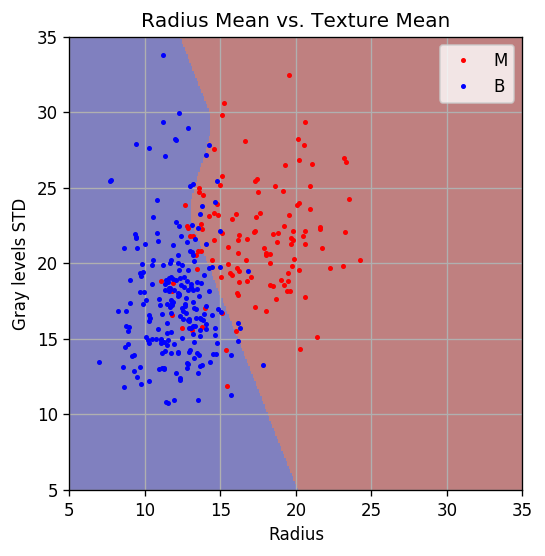

In [ ]:
x1_grid, x2_grid = np.meshgrid(np.arange(5, 35 + 1e-9, 0.1), np.arange(5, 35 + 1e-9, 0.1))

predict = net(torch.tensor(np.stack([x1_grid.flat, x2_grid.flat], axis=1)).float().cuda()) > 0.5
predict = np.reshape(predict.cpu().numpy(), x1_grid.shape)

fig, ax = plt.subplots()
ax.imshow(predict, extent=[x1_grid.min(), x1_grid.max(), x2_grid.max(), x2_grid.min()], cmap='jet', alpha=0.5)
ax.plot(x_train.cpu().numpy()[y_train.cpu().numpy()==1, 0], x_train.cpu().numpy()[y_train.cpu().numpy()==1, 1],'.r', markersize=4, label='M')
ax.plot(x_train.cpu().numpy()[y_train.cpu().numpy()==0, 0], x_train.cpu().numpy()[y_train.cpu().numpy()==0, 1],'.b', markersize=4, label='B')
ax.set_xlim(x1_grid.min(), x1_grid.max())
ax.set_ylim(x2_grid.min(), x2_grid.max())
ax.grid(True)
ax.set_title('Radius Mean vs. Texture Mean')
ax.set_xlabel('Radius')
ax.set_ylabel('Gray levels STD')
ax.legend();

## Important but not covered

- **[Datasets and DataLoader](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)**: Two PyTorch classes to handle the data loading and management, and for running over batches of data.
- **[torch.nn.Sequential](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential)**: A very elegant and simple way to stack a few modules (usually network layers) into a single module.
- **[torchvision](https://pytorch.org/docs/stable/torchvision/index.html)**: An additional package (which is part of the PyTorch project) which adds some tools to PyTorch which are commonly uses in computer vision.
- **[Learning rate scheduling](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)**: PyTorch provides a set of tool for scheduling the learning rate during the learning process.

## Additional Note about Monitoring: TensorBoard and TensorBoardX

When working with long learning stages (in many cases people can even run the learning stage for a few days) the need to monitor the learning process arises. Mainly we would like to monitor how does the objective and the risk functions improve over time (on the train and the validation datasets), and some sampled results.

One of the commonly used tools for this task is TensorFlow's built-in dashboard, which is called **[TensorBaord](https://www.tensorflow.org/tensorboard)**. TensorBoard provides a simple way to writing arbitrary parameters to it, such as the train and test risk, and then arranges them in interactive graphs.

While TensorBoard was originally designed to work specifically with TensorFlow, a package called **[tensorboardX](https://github.com/lanpa/tensorboardX)** enables writing data to the TensorBorad dashboard from any python code.

In this workshops, we will not be going over these tools, but it is highly recommended for anyone running long (more then a few minutes) processes to do so.

In [ ]:
%%html
<link rel="stylesheet" href="../css/style.css"> <!--Setting styles - You can simply ignore this line-->